In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from nltk.tokenize import word_tokenize

In [ ]:
helper_path = "../code/"
sys.path.insert(0, helper_path)

In [ ]:
from New_MissingValue import MissingValue

In [ ]:
# relative path
data_path = "../data/"
data_file_list = ["train.csv","test.csv"]

In [ ]:
# load data
data_train = pd.read_csv(data_path + data_file_list[0])
data_test = pd.read_csv(data_path + data_file_list[1])

# data info
print(f'Training text file: {data_train.shape[0]} rows; {data_train.shape[1]} columns')
print(f'Testing text file: {data_test.shape[0]} rows; {data_test.shape[1]} columns')
data_train.head()

In [ ]:
# check if NaNs exist in training data, and acquire their locations
missing_value_finder_train = MissingValue(data_train)
missing_value_finder_train.missing_value_summary(verbose=True)
missing_value_finder_train.missing_value_enumerator()

In [ ]:
# drop this missing row
for obj in missing_value_finder_train.na_index:
    data_train = data_train.drop([obj])

In [ ]:
# check again
missing_value_finder_train = MissingValue(data_train)
missing_value_finder_train.missing_value_summary(verbose=True)

In [ ]:
data_train.to_csv('../data/train_no_missingValue.csv')

In [ ]:
# check if NaNs exist in test data, and acquire their locations
missing_value_finder_test = MissingValue(data_test)
missing_value_finder_test.missing_value_summary(verbose=True)

Note:
- Missing value check & elimination finished 

# Data Classification

- Classify the data by their features, and save them into separate csv files, named "Positive.csv", "Negative.csv" and "Neutral.csv"

In [ ]:
def SentiSeparation(data):
    Positive=data[data['sentiment']=='positive']
    Negative=data[data['sentiment']=='negative']
    Neutral=data[data['sentiment']=='neutral']
    Positive.to_csv(r'../data/Positive.csv')
    Negative.to_csv(r'../data/Negative.csv')
    Neutral.to_csv(r'../data/Neutral.csv')

In [ ]:
SentiSeparation(data_train)

# Data Cleaning

Since the data set is too large, running through all the data may take too long. Therefore, only data with feature "positive" is tested at this time.

In [2]:
process_path = "../code/"
sys.path.insert(0, process_path)

In [3]:
from TextPreprocessing import *
from StaAnalysis import StaA
import nltk

In [ ]:
Positive=pd.read_csv("../data/Positive/Positive.csv")
Positive=pd.DataFrame(Positive)
Positive.head()

In [ ]:
Negative=pd.read_csv("../data/Negative/Negative.csv")
Negative=pd.DataFrame(Negative)
Negative.head()

In [ ]:
Neutral=pd.read_csv("../data/Neutral/Neutral.csv")
Neutral=pd.DataFrame(Neutral)
Neutral.head()

In [ ]:
# saving path of the cleaned data
save1='../data/Negative_clean_data.csv'
# featured data to be cleaned
feature='selected_text'
# apply the previous function
selected_text=process_to_csv(Negative,feature,save1)
selected_text.head()

In [ ]:
# saving path of the cleaned data
save1='../data/Neutral_clean_data.csv'
# featured data to be cleaned
feature='selected_text'
# apply the previous function
selected_text=process_to_csv(Neutral,feature,save1)
selected_text.head()

In [ ]:
# saving path of the cleaned data
save1='../data/Positive/Positive_clean_data.csv'
#save2='../data/Positive/Positive_clean_data_2bused.csv'
# featured data to be cleaned
feature='selected_text'
# apply the previous function
selected_text=process_to_csv(Positive,feature,save1)
selected_text.head()

# Preparation for Statistical Analysis -- Unigram/Multi-gram

Cleaned data are used to do statistical analysis. Due to the large size of the data to be processed, only first 50 sets of data are tested to verify the code.

## Sentiment: "Positive"

In [4]:
path='../data/Positive/Positive_clean_data.csv'
split_selected_text,split_selected_word=StaA.filter_out(path)

check if unigram works, N=1

In [5]:
split_selected_text[:5]

[['good'], ['better'], ['had', 'an', 'awsome', 'salad'], ['fine'], ['thank']]

In [6]:
split_selected_word[:5]

['good', 'better', 'had', 'an', 'awsome']

In [7]:
# Timing the process of data clean
start=time.time()
uni_gram,uni_presence,uni_frequency,uni_number_unique_term,uniuni_gram=StaA.nGram(split_selected_word,split_selected_text,1)
uni_frequency,uni_presence,uni_rank=StaA.ranking(uni_frequency,uni_presence,uni_gram,'../data/Positive/uni_rank.csv')
end=time.time()
print(end-start)

Unigram text framework
9.236106872558594


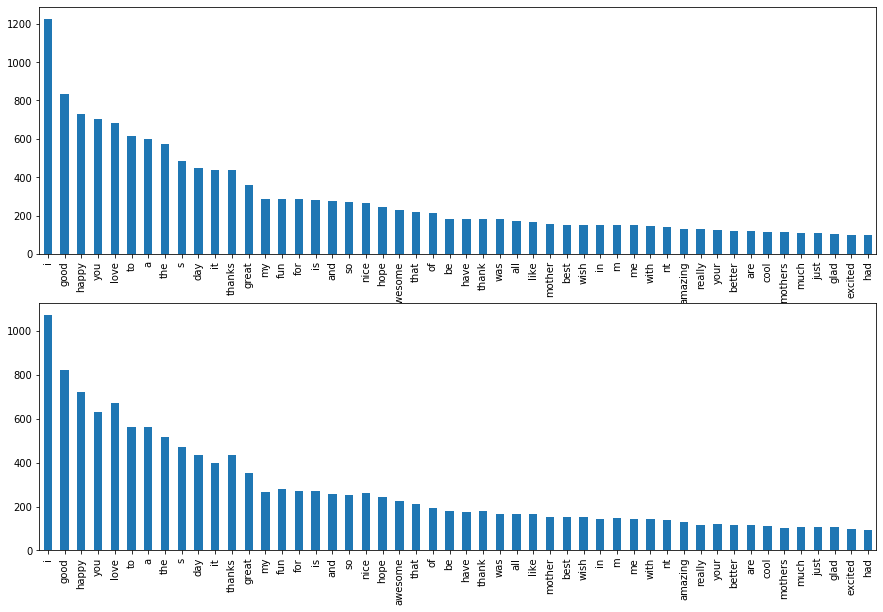

In [8]:
# high frequency word
plt.subplot(2,1,1)
uni_frequency.head(50).plot.bar(figsize=(15,10))
plt.subplot(2,1,2)
uni_presence.head(50).plot.bar(figsize=(15,10))

In [9]:
print(uni_presence)

i           1072.0
good         824.0
happy        722.0
you          632.0
love         670.0
             ...  
hopefull       1.0
apps           1.0
orignal        1.0
marathon       1.0
table          1.0
Name: presence, Length: 3921, dtype: float64


In [10]:
print(uni_frequency)

i           1227
good         836
happy        729
you          703
love         683
            ... 
hopefull       1
apps           1
orignal        1
marathon       1
table          1
Name: frequency, Length: 3921, dtype: int64


In [11]:
print(uni_rank)

          frequency  presence
i              1227    1072.0
good            836     824.0
happy           729     722.0
you             703     632.0
love            683     670.0
...             ...       ...
hopefull          1       1.0
apps              1       1.0
orignal           1       1.0
marathon          1       1.0
table             1       1.0

[3921 rows x 2 columns]


In [12]:
start=time.time()
bi_gram,bi_presence,bi_frequency,bi_number_unique_term,bibi_gram=StaA.nGram(split_selected_word,split_selected_text,2)
bi_frequency,bi_presence,bi_rank=StaA.ranking(bi_frequency,bi_presence,bi_gram,'../data/Positive/bi_rank')
end=time.time()
print(end-start)

2-gram text frame work
26.446906089782715


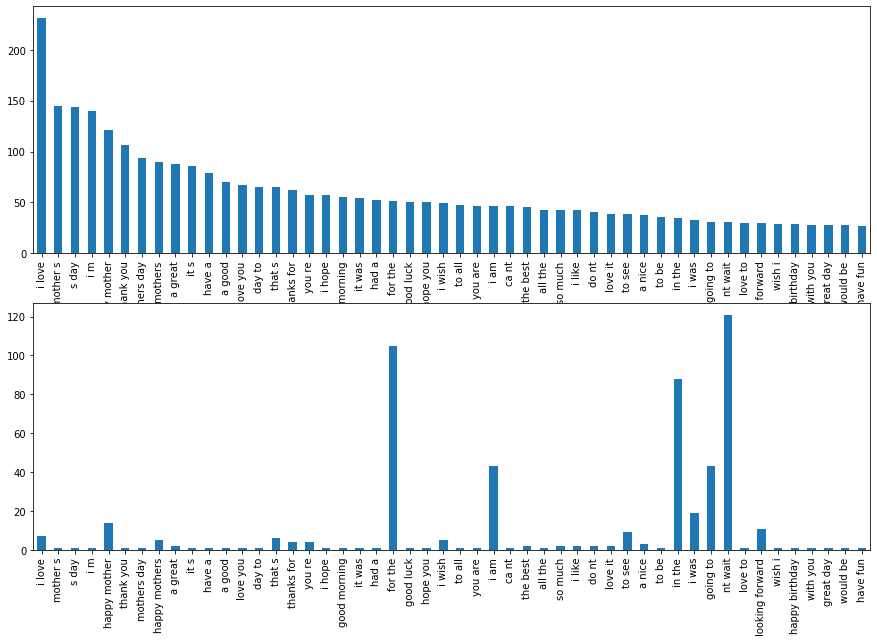

In [13]:
# high frequency word
plt.subplot(2,1,1)
bi_frequency.head(50).plot.bar(figsize=(15,10))
plt.subplot(2,1,2)
bi_presence.head(50).plot.bar(figsize=(15,10))

In [14]:
print(bi_frequency)

i love             231
mother s           145
s day              144
i m                140
happy mother       121
                  ... 
cupcakes were        1
reports fr           1
few surviving        1
entertaining tv      1
chopped onion        1
Name: frequency, Length: 12877, dtype: int64


In [15]:
print(bi_presence)

i love               7.0
mother s             1.0
s day                1.0
i m                  1.0
happy mother        14.0
                   ...  
cupcakes were        4.0
reports fr         135.0
few surviving        3.0
entertaining tv      1.0
chopped onion       11.0
Name: presence, Length: 12877, dtype: float64


In [16]:
print(bi_rank)

                 frequency  presence
i love                 231       7.0
mother s               145       1.0
s day                  144       1.0
i m                    140       1.0
happy mother           121      14.0
...                    ...       ...
cupcakes were            1       4.0
reports fr               1     135.0
few surviving            1       3.0
entertaining tv          1       1.0
chopped onion            1      11.0

[12877 rows x 2 columns]


check if multi-gram works, N=4

In [17]:
start=time.time()
tri_gram,tri_presence,tri_frequency,tri_number_unique_term,tritri_gram=StaA.nGram(split_selected_word,split_selected_text,3)
tri_frequency,tri_presence,tri_rank=StaA.ranking(tri_frequency,tri_presence,tri_gram,'../data/Positive/tri_rank.csv')
end=time.time()
print(end-start)

3-gram text frame work
27.211559772491455


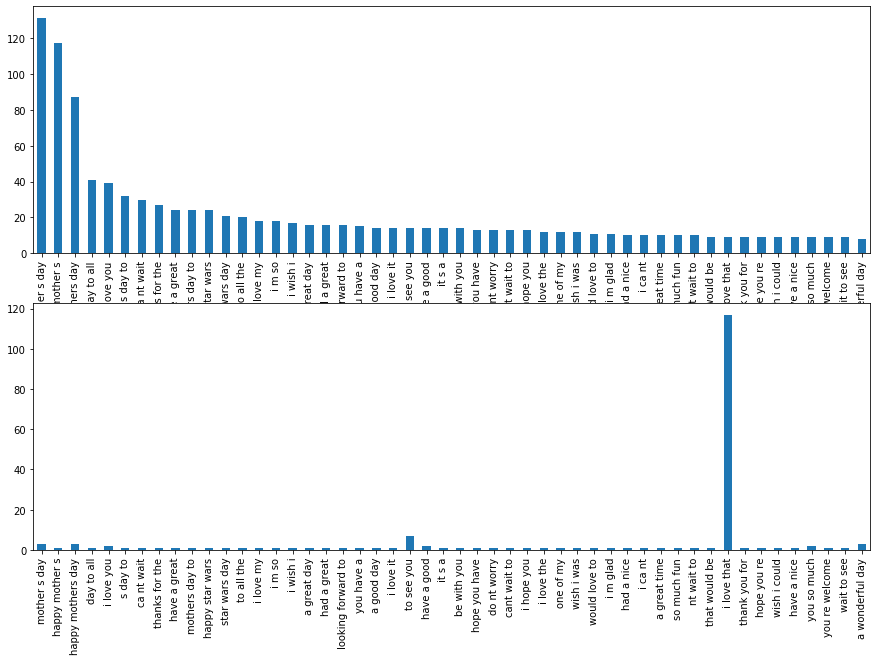

In [18]:
# high frequency word
plt.subplot(2,1,1)
tri_frequency.head(50).plot.bar(figsize=(15,10))
plt.subplot(2,1,2)
tri_presence.head(50).plot.bar(figsize=(15,10))

In [19]:
print(tri_frequency)

mother s day            131
happy mother s          117
happy mothers day        87
day to all               41
i love you               39
                       ... 
and hope you              1
argue as they             1
and sensibility here      1
ya id love                1
wan na good               1
Name: frequency, Length: 14708, dtype: int64


In [20]:
print(tri_presence)

mother s day            3.0
happy mother s          1.0
happy mothers day       3.0
day to all              1.0
i love you              2.0
                       ... 
and hope you            1.0
argue as they           1.0
and sensibility here    1.0
ya id love              3.0
wan na good             2.0
Name: presence, Length: 14708, dtype: float64


In [21]:
print(tri_rank)

                      frequency  presence
mother s day                131       3.0
happy mother s              117       1.0
happy mothers day            87       3.0
day to all                   41       1.0
i love you                   39       2.0
...                         ...       ...
and hope you                  1       1.0
argue as they                 1       1.0
and sensibility here          1       1.0
ya id love                    1       3.0
wan na good                   1       2.0

[14708 rows x 2 columns]


In [22]:
start=time.time()
tert_gram,tert_presence,tert_frequency,tert_number_unique_term,terttert_gram=StaA.nGram(split_selected_word,split_selected_text,4)
tert_frequency,tert_presence,tert_rank=StaA.ranking(tert_frequency,tert_presence,tert_gram,'../data/Positive/tert_rank.csv')
end=time.time()
print(end-start)

4-gram text frame work
21.31003499031067


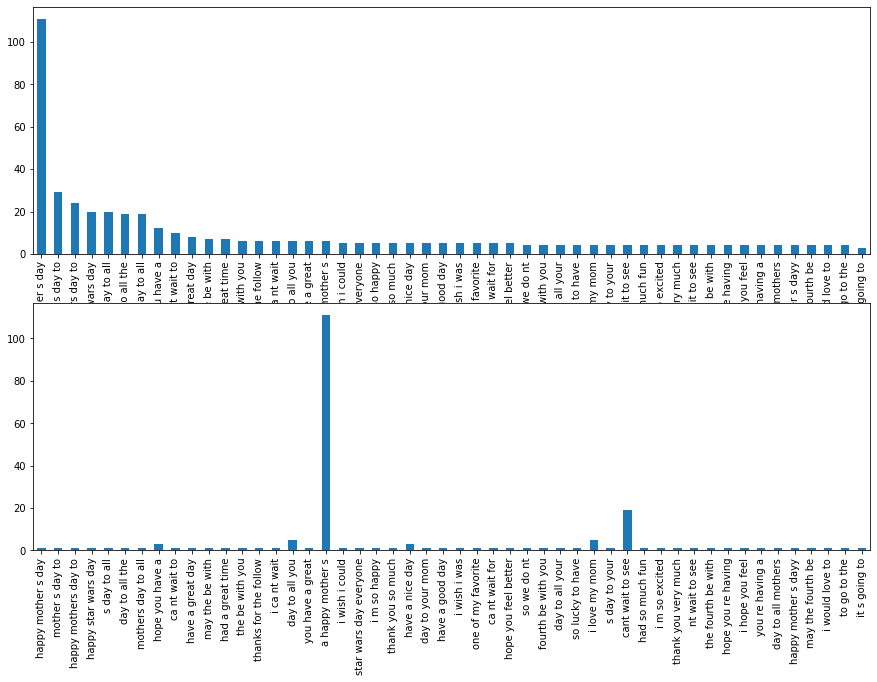

In [23]:
# high frequency word
plt.subplot(2,1,1)
tert_frequency.head(50).plot.bar(figsize=(15,10))
plt.subplot(2,1,2)
tert_presence.head(50).plot.bar(figsize=(15,10))

In [24]:
print(tert_frequency)

happy mother s day        111
mother s day to            29
happy mothers day to       24
happy star wars day        20
s day to all               20
                         ... 
a challenge and a           1
rest if you need            1
e yum yum yum               1
thanks for the retweet      1
his fixed our ski           1
Name: frequency, Length: 12986, dtype: int64


In [25]:
print(tert_presence)

happy mother s day        1.0
mother s day to           1.0
happy mothers day to      1.0
happy star wars day       1.0
s day to all              1.0
                         ... 
a challenge and a         1.0
rest if you need          1.0
e yum yum yum             1.0
thanks for the retweet    1.0
his fixed our ski         1.0
Name: presence, Length: 12986, dtype: float64


In [26]:
print(tert_rank)

                        frequency  presence
happy mother s day            111       1.0
mother s day to                29       1.0
happy mothers day to           24       1.0
happy star wars day            20       1.0
s day to all                   20       1.0
...                           ...       ...
a challenge and a               1       1.0
rest if you need                1       1.0
e yum yum yum                   1       1.0
thanks for the retweet          1       1.0
his fixed our ski               1       1.0

[12986 rows x 2 columns]


## Sentiment: Negative

In [27]:
negative_path='../data/Negative/Negative_clean_data.csv'
split_selected_text,split_selected_word=StaA.filter_out(negative_path)

check if unigram works, N=1

In [28]:
split_selected_text[:5]

[['i', 'dont', 'think', 'you', 'can', 'vote', 'anymore'],
 ['headache'],
 ['miss', 'you', 'my', 'dear'],
 ['my', 'tummy', 'is', 'not', 'happy', 'boo'],
 ['s', 'not', 'good']]

In [29]:
split_selected_word[:5]

['i', 'dont', 'think', 'you', 'can']

In [30]:
# Timing the process of data clean
start=time.time()
uni_gram,uni_presence,uni_frequency,uni_number_unique_term,uniuni_gram=StaA.nGram(split_selected_word,split_selected_text,1)
uni_frequency,uni_presence,uni_rank=StaA.ranking(uni_frequency,uni_presence,uni_gram,'../data/Negative/uni_rank.csv')
end=time.time()
print(end-start)

Unigram text framework
10.654402017593384


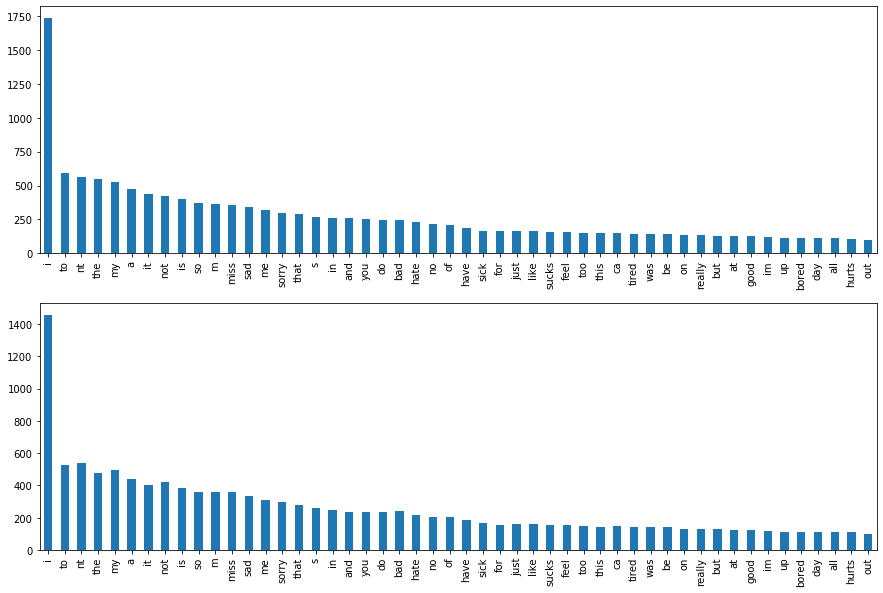

In [31]:
# high frequency word
plt.subplot(2,1,1)
uni_frequency.head(50).plot.bar(figsize=(15,10))
plt.subplot(2,1,2)
uni_presence.head(50).plot.bar(figsize=(15,10))

In [32]:
print(uni_presence)

i           1458.0
to           529.0
nt           541.0
the          477.0
my           496.0
             ...  
keyboard       1.0
toilets        1.0
burger         1.0
alter          1.0
table          1.0
Name: presence, Length: 4547, dtype: float64


In [33]:
print(uni_frequency)

i           1733
to           595
nt           560
the          549
my           526
            ... 
keyboard       1
toilets        1
burger         1
alter          1
table          1
Name: frequency, Length: 4547, dtype: int64


In [34]:
print(uni_rank)

          frequency  presence
i              1733    1458.0
to              595     529.0
nt              560     541.0
the             549     477.0
my              526     496.0
...             ...       ...
keyboard          1       1.0
toilets           1       1.0
burger            1       1.0
alter             1       1.0
table             1       1.0

[4547 rows x 2 columns]


In [35]:
start=time.time()
bi_gram,bi_presence,bi_frequency,bi_number_unique_term,bibi_gram=StaA.nGram(split_selected_word,split_selected_text,2)
bi_frequency,bi_presence,bi_rank=StaA.ranking(bi_frequency,bi_presence,bi_gram,'../data/Negative/bi_rank')
end=time.time()
print(end-start)

2-gram text frame work
29.45432710647583


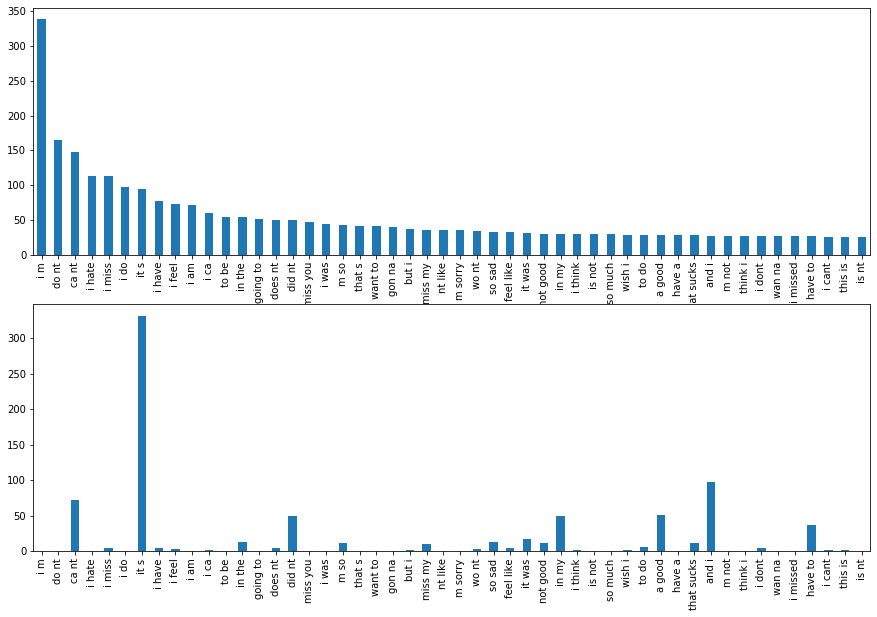

In [36]:
# high frequency word
plt.subplot(2,1,1)
bi_frequency.head(50).plot.bar(figsize=(15,10))
plt.subplot(2,1,2)
bi_presence.head(50).plot.bar(figsize=(15,10))

In [37]:
print(bi_frequency)

i m              338
do nt            165
ca nt            147
i hate           113
i miss           113
                ... 
britains got       1
panicky and        1
overtime this      1
pleasee im         1
for ya             1
Name: frequency, Length: 14406, dtype: int64


In [38]:
print(bi_presence)

i m                1.0
do nt              1.0
ca nt             72.0
i hate             1.0
i miss             5.0
                 ...  
britains got     331.0
panicky and        3.0
overtime this      1.0
pleasee im         5.0
for ya            27.0
Name: presence, Length: 14406, dtype: float64


In [39]:
print(bi_rank)

               frequency  presence
i m                  338       1.0
do nt                165       1.0
ca nt                147      72.0
i hate               113       1.0
i miss               113       5.0
...                  ...       ...
britains got           1     331.0
panicky and            1       3.0
overtime this          1       1.0
pleasee im             1       5.0
for ya                 1      27.0

[14406 rows x 2 columns]


check if multi-gram works, N=3

In [40]:
start=time.time()
tri_gram,tri_presence,tri_frequency,tri_number_unique_term,tritri_gram=StaA.nGram(split_selected_word,split_selected_text,3)
tri_frequency,tri_presence,tri_rank=StaA.ranking(tri_frequency,tri_presence,tri_gram,'../data/Negative/tri_rank.csv')
end=time.time()
print(end-start)

3-gram text frame work
30.498311042785645


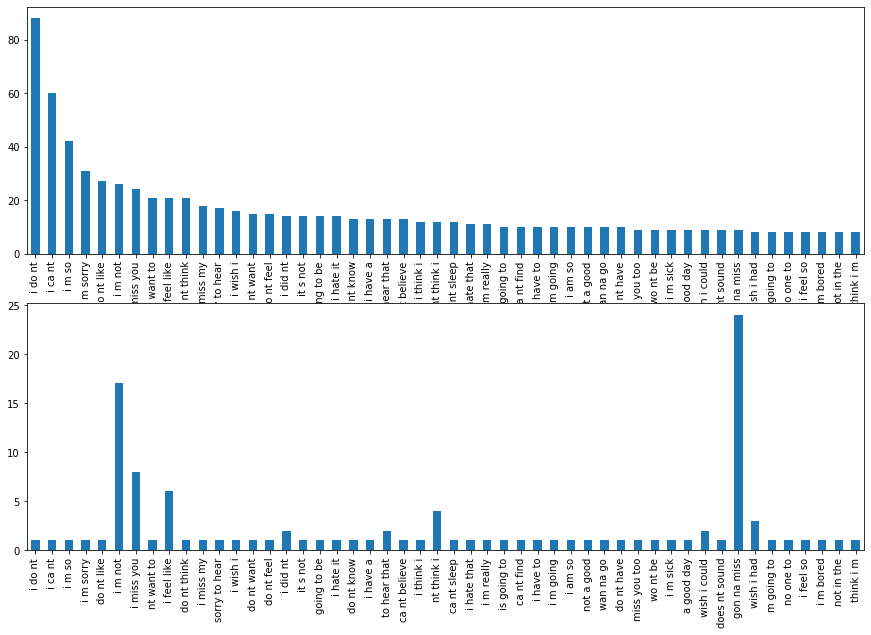

In [41]:
# high frequency word
plt.subplot(2,1,1)
tri_frequency.head(50).plot.bar(figsize=(15,10))
plt.subplot(2,1,2)
tri_presence.head(50).plot.bar(figsize=(15,10))

In [42]:
print(tri_frequency)

i do nt              88
i ca nt              60
i m so               42
i m sorry            31
do nt like           27
                     ..
got rained out        1
good we have          1
nt want her           1
the middle layers     1
nugget bit jack       1
Name: frequency, Length: 16683, dtype: int64


In [43]:
print(tri_presence)

i do nt              1.0
i ca nt              1.0
i m so               1.0
i m sorry            1.0
do nt like           1.0
                    ... 
got rained out       1.0
good we have         1.0
nt want her          1.0
the middle layers    1.0
nugget bit jack      1.0
Name: presence, Length: 16683, dtype: float64


In [44]:
print(tri_rank)

                   frequency  presence
i do nt                   88       1.0
i ca nt                   60       1.0
i m so                    42       1.0
i m sorry                 31       1.0
do nt like                27       1.0
...                      ...       ...
got rained out             1       1.0
good we have               1       1.0
nt want her                1       1.0
the middle layers          1       1.0
nugget bit jack            1       1.0

[16683 rows x 2 columns]


In [45]:
start=time.time()
tert_gram,tert_presence,tert_frequency,tert_number_unique_term,terttert_gram=StaA.nGram(split_selected_word,split_selected_text,4)
tert_frequency,tert_presence,tert_rank=StaA.ranking(tert_frequency,tert_presence,tert_gram,'../data/Negative/tert_rank.csv')
end=time.time()
print(end-start)

4-gram text frame work
28.440242052078247


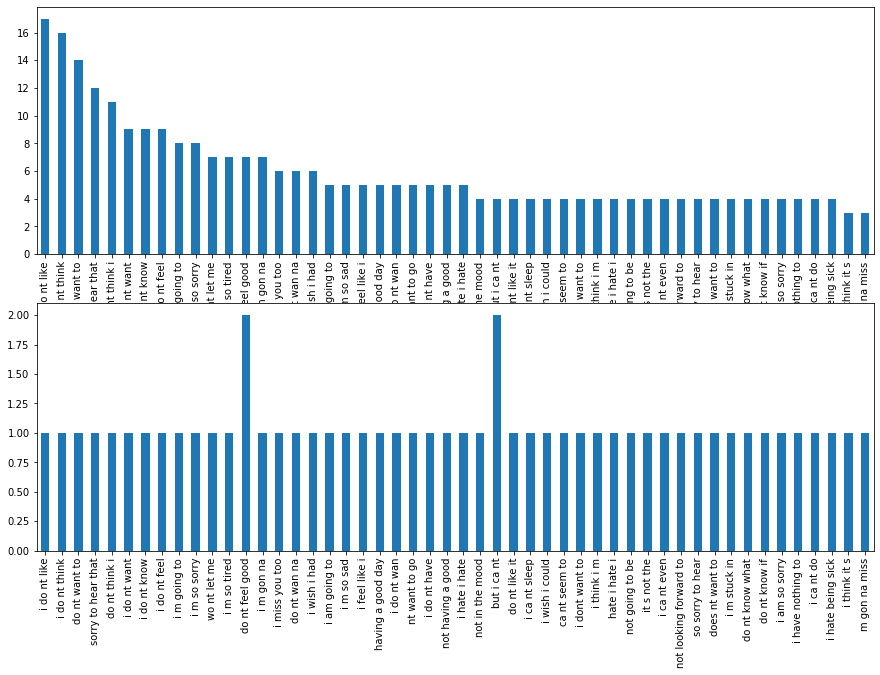

In [46]:
# high frequency word
plt.subplot(2,1,1)
tert_frequency.head(50).plot.bar(figsize=(15,10))
plt.subplot(2,1,2)
tert_presence.head(50).plot.bar(figsize=(15,10))

In [47]:
print(tert_frequency)

i do nt like                17
i do nt think               16
do nt want to               14
sorry to hear that          12
do nt think i               11
                            ..
running this is what         1
bad for him he               1
pridelines got talent is     1
with other work not          1
s like a hot                 1
Name: frequency, Length: 14730, dtype: int64


In [48]:
print(tert_presence)

i do nt like                1.0
i do nt think               1.0
do nt want to               1.0
sorry to hear that          1.0
do nt think i               1.0
                           ... 
running this is what        1.0
bad for him he              1.0
pridelines got talent is    1.0
with other work not         1.0
s like a hot                1.0
Name: presence, Length: 14730, dtype: float64


In [49]:
print(tert_rank)

                          frequency  presence
i do nt like                     17       1.0
i do nt think                    16       1.0
do nt want to                    14       1.0
sorry to hear that               12       1.0
do nt think i                    11       1.0
...                             ...       ...
running this is what              1       1.0
bad for him he                    1       1.0
pridelines got talent is          1       1.0
with other work not               1       1.0
s like a hot                      1       1.0

[14730 rows x 2 columns]


## Sentiment: Neutral

In [50]:
neutral_path='../data/Neutral/Neutral_clean_data.csv'
split_selected_text,split_selected_word=StaA.filter_out(neutral_path)

check if unigram works, N=1

In [51]:
split_selected_text[:5]

[['my', 'boss', 'was', 'not', 'happy', 'them', 'lots', 'of', 'fun'],
 ['says', 'good', 'or', 'should', 'i', 'say', 'bad', 'afternoon'],
 ['why',
  'do',
  'nt',
  'adobe',
  'realise',
  'no',
  'one',
  'wants',
  'to',
  'pay',
  'for',
  'photoshop',
  'et',
  'al',
  'so',
  'they',
  'should',
  'just',
  'give',
  'it',
  'to',
  'us',
  'for',
  'free'],
 ['prd', 'take', 'a', 'long', 'time', 'to', 'review'],
 ['well',
  'having',
  'to',
  'revise',
  'them',
  'was',
  'to',
  'do',
  'some',
  'more',
  'gardening',
  'now',
  'i',
  'guess',
  'hoovering',
  'and',
  'some',
  'warcraft',
  'not',
  'played',
  'in',
  'a',
  'week']]

In [52]:
split_selected_word[:5]

['my', 'boss', 'was', 'not', 'happy']

In [54]:
# Timing the process of data clean
start=time.time()
uni_gram,uni_presence,uni_frequency,uni_number_unique_term,uniuni_gram=StaA.nGram(split_selected_word,split_selected_text,1)
uni_frequency,uni_presence,uni_rank=StaA.ranking(uni_frequency,uni_presence,uni_gram,'../data/Neutral/uni_rank.csv')
end=time.time()
print(end-start)

Unigram text framework
79.46899199485779


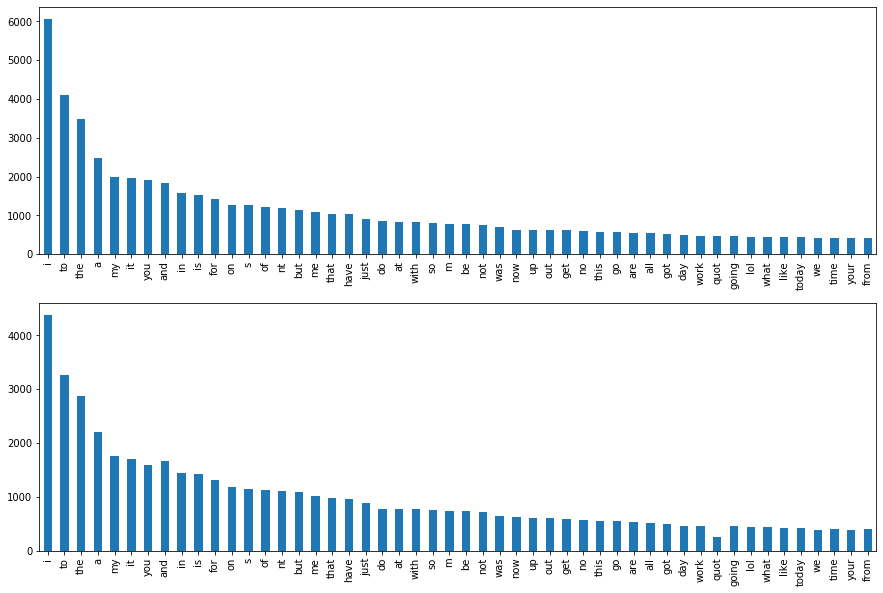

In [55]:
# high frequency word
plt.subplot(2,1,1)
uni_frequency.head(50).plot.bar(figsize=(15,10))
plt.subplot(2,1,2)
uni_presence.head(50).plot.bar(figsize=(15,10))

In [56]:
print(uni_presence)

i           4376.0
to          3265.0
the         2866.0
a           2196.0
my          1755.0
             ...  
toaster        1.0
alexis         1.0
whom           1.0
lorenzo        1.0
onscreen       1.0
Name: presence, Length: 13570, dtype: float64


In [57]:
print(uni_frequency)

i           6071
to          4099
the         3483
a           2482
my          1977
            ... 
toaster        1
alexis         1
whom           1
lorenzo        1
onscreen       1
Name: frequency, Length: 13570, dtype: int64


In [58]:
print(uni_rank)

          frequency  presence
i              6071    4376.0
to             4099    3265.0
the            3483    2866.0
a              2482    2196.0
my             1977    1755.0
...             ...       ...
toaster           1       1.0
alexis            1       1.0
whom              1       1.0
lorenzo           1       1.0
onscreen          1       1.0

[13570 rows x 2 columns]


In [59]:
start=time.time()
bi_gram,bi_presence,bi_frequency,bi_number_unique_term,bibi_gram=StaA.nGram(split_selected_word,split_selected_text,2)
bi_frequency,bi_presence,bi_rank=StaA.ranking(bi_frequency,bi_presence,bi_gram,'../data/Neutral/bi_rank')
end=time.time()
print(end-start)

2-gram text frame work
347.6039869785309


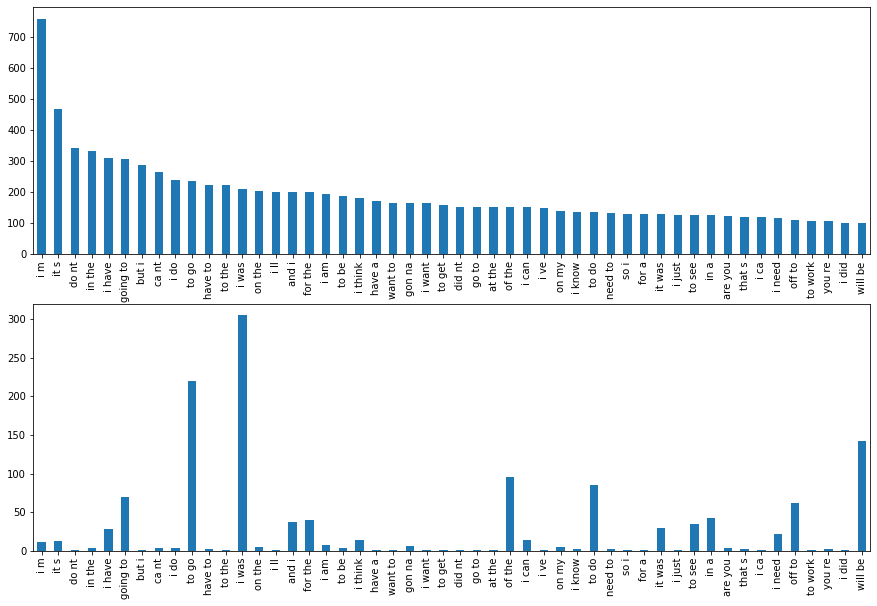

In [60]:
# high frequency word
plt.subplot(2,1,1)
bi_frequency.head(50).plot.bar(figsize=(15,10))
plt.subplot(2,1,2)
bi_presence.head(50).plot.bar(figsize=(15,10))

In [61]:
print(bi_frequency)

i m                   759
it s                  467
do nt                 343
in the                332
i have                310
                     ... 
boa tarde               1
thatmakes messages      1
ch c                    1
had already             1
stoopit girl            1
Name: frequency, Length: 65973, dtype: int64


In [62]:
print(bi_presence)

i m                   12.0
it s                  13.0
do nt                  1.0
in the                 4.0
i have                28.0
                      ... 
boa tarde             23.0
thatmakes messages     3.0
ch c                   1.0
had already            1.0
stoopit girl           2.0
Name: presence, Length: 65973, dtype: float64


In [63]:
print(bi_rank)

                    frequency  presence
i m                       759      12.0
it s                      467      13.0
do nt                     343       1.0
in the                    332       4.0
i have                    310      28.0
...                       ...       ...
boa tarde                   1      23.0
thatmakes messages          1       3.0
ch c                        1       1.0
had already                 1       1.0
stoopit girl                1       2.0

[65973 rows x 2 columns]


check if multi-gram works, N=3

In [64]:
start=time.time()
tri_gram,tri_presence,tri_frequency,tri_number_unique_term,tritri_gram=StaA.nGram(split_selected_word,split_selected_text,3)
tri_frequency,tri_presence,tri_rank=StaA.ranking(tri_frequency,tri_presence,tri_gram,'../data/Neutral/tri_rank.csv')
end=time.time()
print(end-start)

3-gram text frame work
498.1167001724243


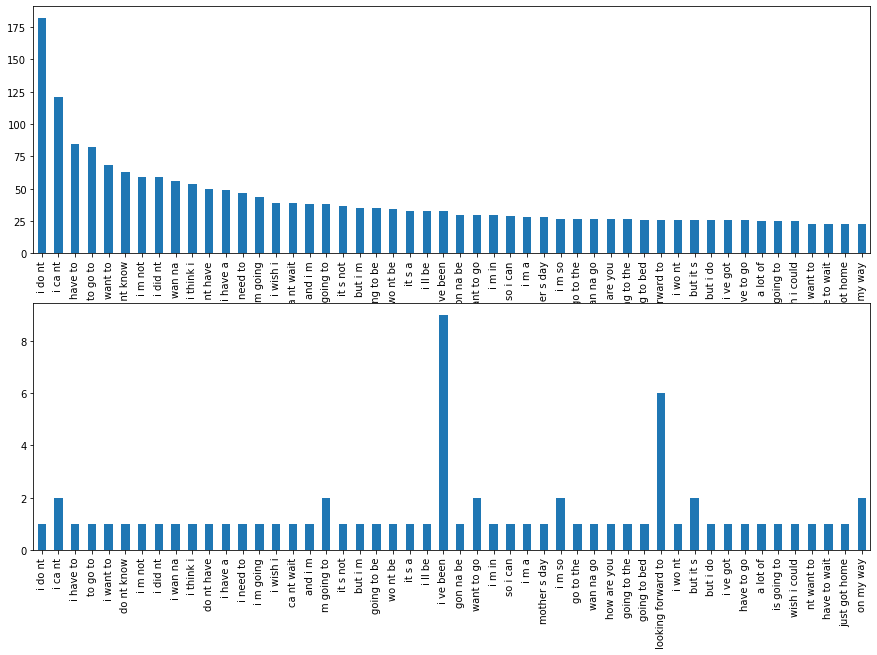

In [65]:
# high frequency word
plt.subplot(2,1,1)
tri_frequency.head(50).plot.bar(figsize=(15,10))
plt.subplot(2,1,2)
tri_presence.head(50).plot.bar(figsize=(15,10))

In [66]:
print(tri_frequency)

i do nt                182
i ca nt                121
i have to               85
to go to                82
i want to               68
                      ... 
chatting with willy      1
days whatever to         1
but opera and            1
that one slip            1
you just said            1
Name: frequency, Length: 97008, dtype: int64


In [67]:
print(tri_presence)

i do nt                1.0
i ca nt                2.0
i have to              1.0
to go to               1.0
i want to              1.0
                      ... 
chatting with willy    1.0
days whatever to       1.0
but opera and          1.0
that one slip          1.0
you just said          1.0
Name: presence, Length: 97008, dtype: float64


In [68]:
print(tri_rank)

                     frequency  presence
i do nt                    182       1.0
i ca nt                    121       2.0
i have to                   85       1.0
to go to                    82       1.0
i want to                   68       1.0
...                        ...       ...
chatting with willy          1       1.0
days whatever to             1       1.0
but opera and                1       1.0
that one slip                1       1.0
you just said                1       1.0

[97008 rows x 2 columns]


In [69]:
start=time.time()
tert_gram,tert_presence,tert_frequency,tert_number_unique_term,terttert_gram=StaA.nGram(split_selected_word,split_selected_text,4)
tert_frequency,tert_presence,tert_rank=StaA.ranking(tert_frequency,tert_presence,tert_gram,'../data/Neutral/tert_rank.csv')
end=time.time()
print(end-start)

4-gram text frame work
486.48705792427063


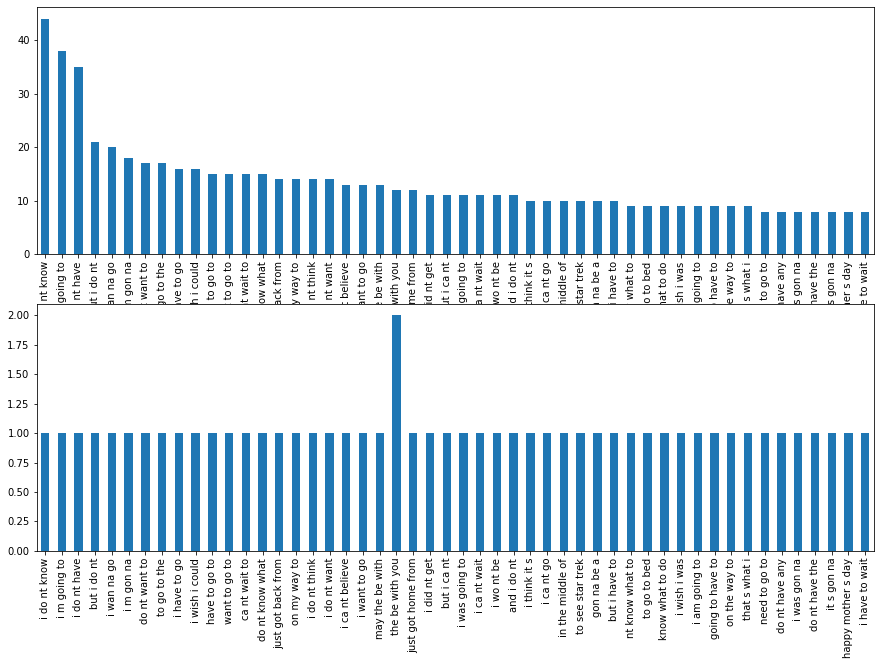

In [70]:
# high frequency word
plt.subplot(2,1,1)
tert_frequency.head(50).plot.bar(figsize=(15,10))
plt.subplot(2,1,2)
tert_presence.head(50).plot.bar(figsize=(15,10))

In [71]:
print(tert_frequency)

i do nt know                  44
i m going to                  38
i do nt have                  35
but i do nt                   21
i wan na go                   20
                              ..
up from time to                1
tweeted in like a              1
head next whats on             1
re evacuating the building     1
and take possession of         1
Name: frequency, Length: 99002, dtype: int64


In [72]:
print(tert_presence)

i do nt know                  1.0
i m going to                  1.0
i do nt have                  1.0
but i do nt                   1.0
i wan na go                   1.0
                             ... 
up from time to               1.0
tweeted in like a             1.0
head next whats on            1.0
re evacuating the building    1.0
and take possession of        1.0
Name: presence, Length: 99002, dtype: float64


In [73]:
print(tert_rank)

                            frequency  presence
i do nt know                       44       1.0
i m going to                       38       1.0
i do nt have                       35       1.0
but i do nt                        21       1.0
i wan na go                        20       1.0
...                               ...       ...
up from time to                     1       1.0
tweeted in like a                   1       1.0
head next whats on                  1       1.0
re evacuating the building          1       1.0
and take possession of              1       1.0

[99002 rows x 2 columns]


# Numerify the Text Output of 'Sentiment'

In [ ]:
sentiment=pd.get_dummies(data_train['sentiment'])
print(sentiment)

Assigning sentiment information with values.

In [ ]:
from nltk import FreqDist
import pickle
import sys
import utils

In [ ]:
from collections import Counter

In [ ]:
split_selected_text